In [4]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3d76dc90379a965d3c33f65182e11cb214162aa249b6690a47308c341b9bb6eb
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
# CIFAR-10から画像データを取得
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 [==============================] - 4s 0us/step
学習データ（問題画像）：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


In [5]:
y_train, y_test = y_train.flatten(), y_test.flatten()

cat_train = x_train[np.where(y_train==3)]
dog_train = x_train[np.where(y_train==5)]
cat_test = x_test[np.where(y_test==3)]
dog_test = x_test[np.where(y_test==5)]

print("ネコの学習データ：", len(cat_train))
print("イヌの学習データ：", len(dog_train))
print("ネコのテストデータ：", len(cat_test))
print("イヌのテストデータ：", len(dog_test))

ネコの学習データ： 5000
イヌの学習データ： 5000
ネコのテストデータ： 1000
イヌのテストデータ： 1000


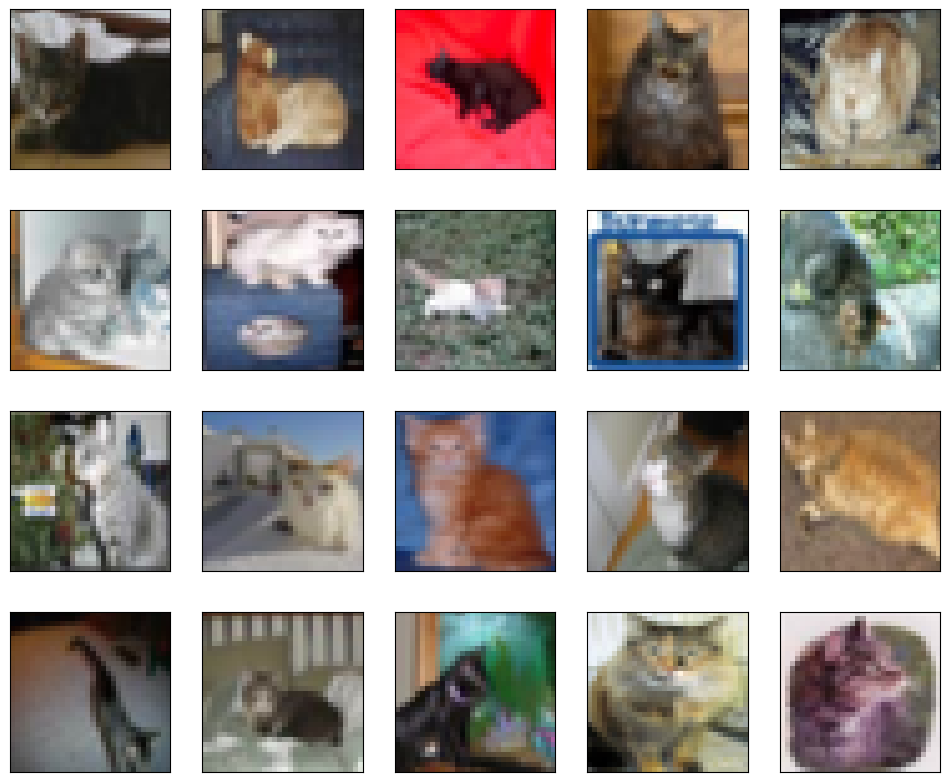

In [7]:
def disp_testdata(xdata, namedata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(namedata)
    plt.show()

disp_testdata(cat_train,"")

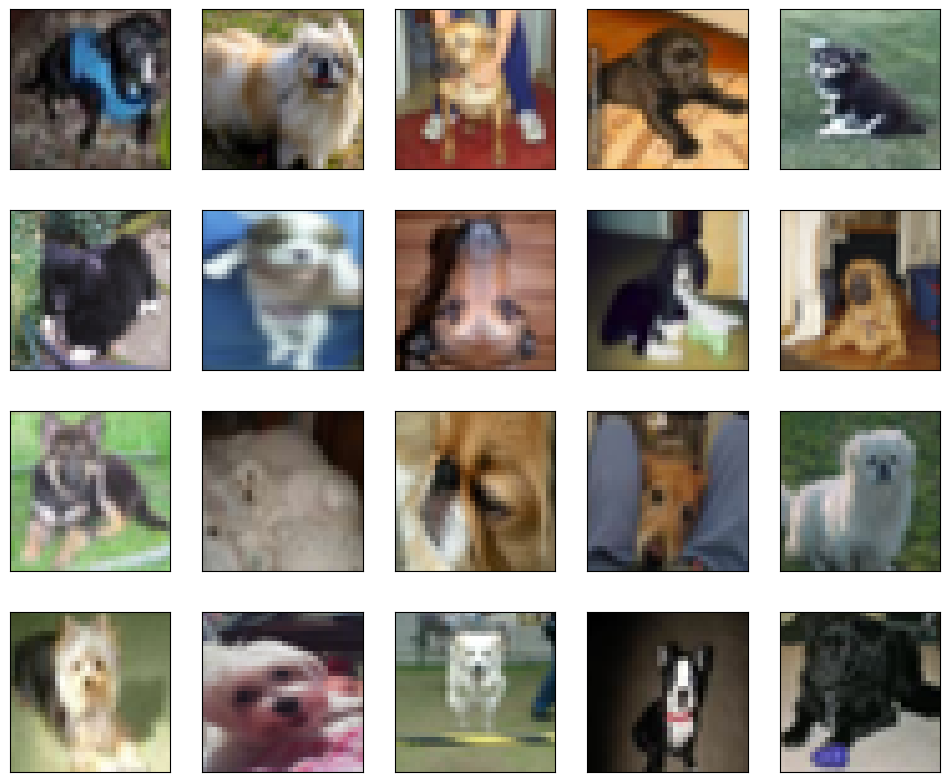

In [8]:
disp_testdata(dog_train, "")

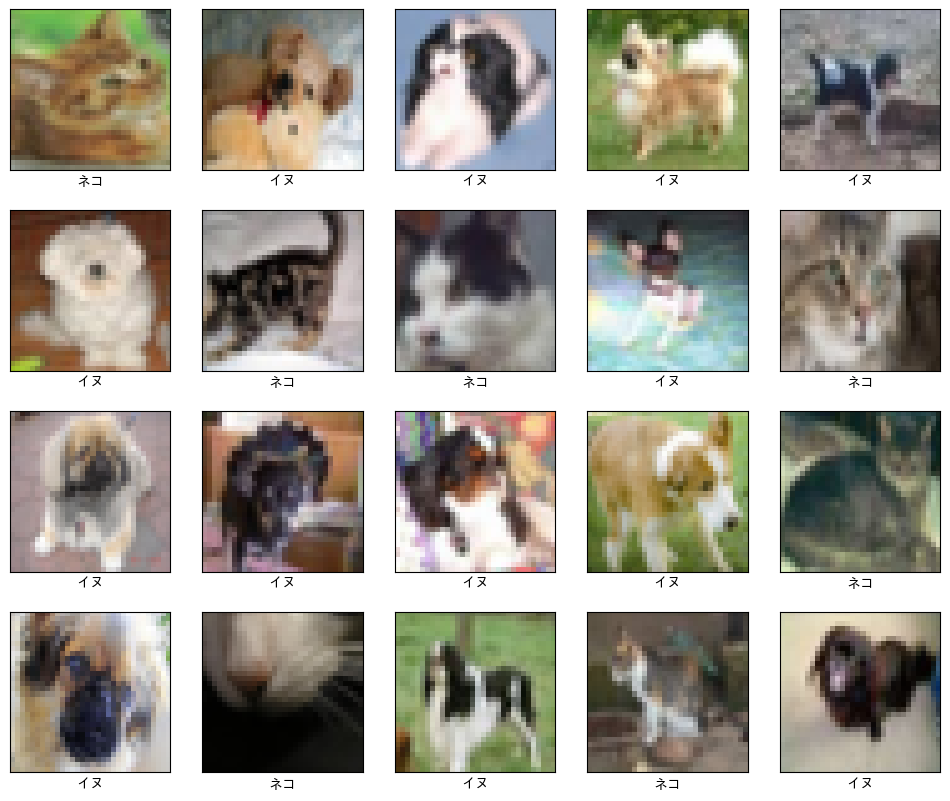

In [ ]:
# 取得した学習用画像に猫と犬を設定
class_names = ["ネコ", "イヌ"]

x_train = np.concatenate((cat_train, dog_train))
x_test = np.concatenate((cat_test, dog_test))

y_train = np.concatenate((np.full(5000, 0), np.full(5000, 1)))
y_test = np.concatenate((np.full(1000, 0), np.full(1000, 1)))

np.random.seed(1)
np.random.shuffle(x_test)
np.random.seed(1)
np.random.shuffle(y_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [ ]:
# 学習画像を基に学習モデルを作成
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="softmax")) #2
model.summary(line_length=120)

Model: "sequential"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 conv2d (Conv2D)                                      (None, 28, 28, 32)                              2432              
                                                                                                                        
 max_pooling2d (MaxPooling2D)                         (None, 14, 14, 32)                              0                 
                                                                                                                        
 dropout (Dropout)                                    (None, 14, 14, 32)                              0                 
                                                                                                                        
 conv2d_1 (C

In [ ]:
# 作成した学習モデルを基に学習させる
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)


Epoch 1/30
313/313 [==============================] - 19s 55ms/step - loss: 0.6871 - accuracy: 0.5386 - val_loss: 0.6733 - val_accuracy: 0.6085
Epoch 2/30
313/313 [==============================] - 16s 52ms/step - loss: 0.6531 - accuracy: 0.6201 - val_loss: 0.6240 - val_accuracy: 0.6590
Epoch 3/30
313/313 [==============================] - 16s 52ms/step - loss: 0.6153 - accuracy: 0.6572 - val_loss: 0.5856 - val_accuracy: 0.6905
Epoch 4/30
313/313 [==============================] - 17s 55ms/step - loss: 0.5929 - accuracy: 0.6749 - val_loss: 0.5814 - val_accuracy: 0.6995
Epoch 5/30
313/313 [==============================] - 16s 52ms/step - loss: 0.5708 - accuracy: 0.6983 - val_loss: 0.5732 - val_accuracy: 0.6895
Epoch 6/30
313/313 [==============================] - 16s 50ms/step - loss: 0.5499 - accuracy: 0.7124 - val_loss: 0.5451 - val_accuracy: 0.7205
Epoch 7/30
313/313 [==============================] - 18s 57ms/step - loss: 0.5312 - accuracy: 0.7297 - val_loss: 0.5312 - val_accuracy:

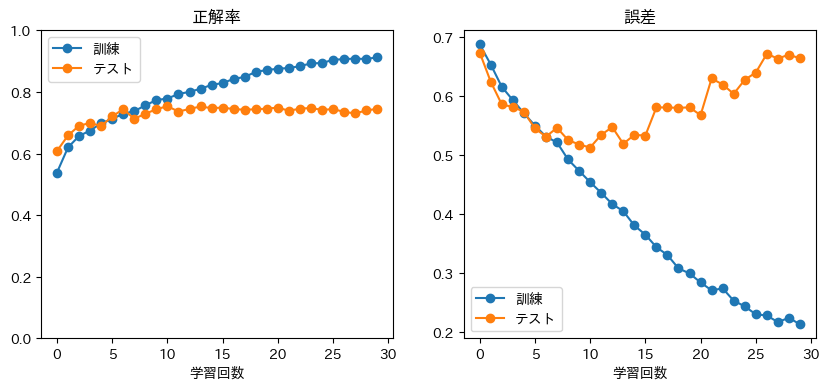

In [ ]:
# 学習結果を確認
param = [["正解率", "accuracy", "val_accuracy"],
         ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練", "テスト"], loc="best")
    if i == 0:
        plt.ylim([0, 1])
plt.show()

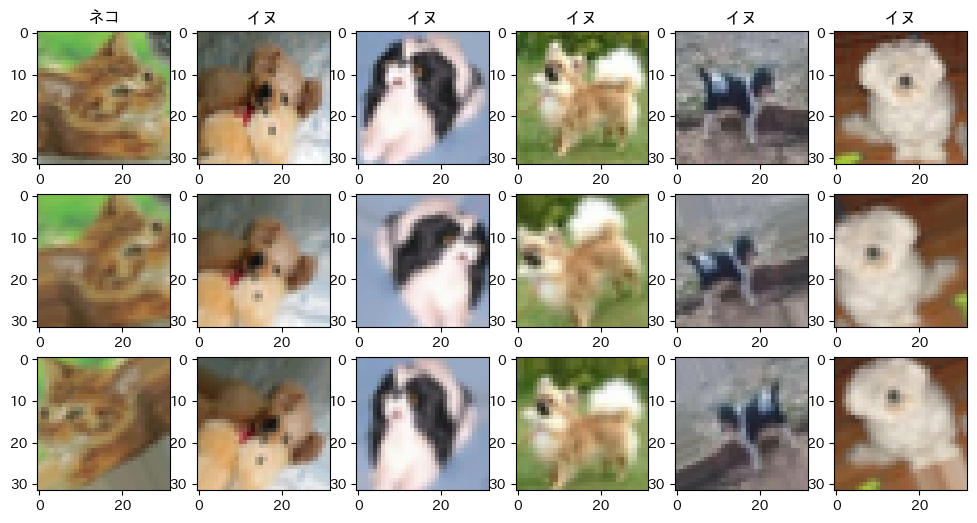

In [ ]:
# 学習用画像を増幅させる
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
)
g = datagen.flow(x_test, y_test, shuffle = False)
g_imgs1 = []
x_g, y_g = g.next()
g_imgs1.extend(x_g)

g = datagen.flow(x_test, y_test, shuffle = False)
g_imgs2 = []
x_g, y_g = g.next()
g_imgs2.extend(x_g)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(3, 6, i+1)
    plt.imshow(x_test[i], cmap = "Greys")
    plt.title(class_names[y_g[i]])

for i in range(6):
    plt.subplot(3, 6, i+7)
    plt.imshow(g_imgs1[i])

for i in range(6):
    plt.subplot(3, 6, i+13)
    plt.imshow(g_imgs2[i])

plt.show()

In [ ]:
# 増幅データで再度学習させる
history = model.fit(datagen.flow(x_train, y_train), epochs = 30,
                    validation_data = (x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/30
313/313 [==============================] - 23s 71ms/step - loss: 0.5991 - accuracy: 0.6858 - val_loss: 0.4975 - val_accuracy: 0.7550
Epoch 2/30
313/313 [==============================] - 23s 73ms/step - loss: 0.5606 - accuracy: 0.7095 - val_loss: 0.4919 - val_accuracy: 0.7675
Epoch 3/30
313/313 [==============================] - 20s 65ms/step - loss: 0.5465 - accuracy: 0.7239 - val_loss: 0.4824 - val_accuracy: 0.7640
Epoch 4/30
313/313 [==============================] - 23s 73ms/step - loss: 0.5453 - accuracy: 0.7162 - val_loss: 0.4926 - val_accuracy: 0.7580
Epoch 5/30
313/313 [==============================] - 21s 66ms/step - loss: 0.5405 - accuracy: 0.7268 - val_loss: 0.4666 - val_accuracy: 0.7845
Epoch 6/30
313/313 [==============================] - 22s 70ms/step - loss: 0.5413 - accuracy: 0.7255 - val_loss: 0.4802 - val_accuracy: 0.7695
Epoch 7/30
313/313 [==============================] - 21s 67ms/step - loss: 0.5288 - accuracy: 0.7300 - val_loss: 0.4828 - val_accuracy:

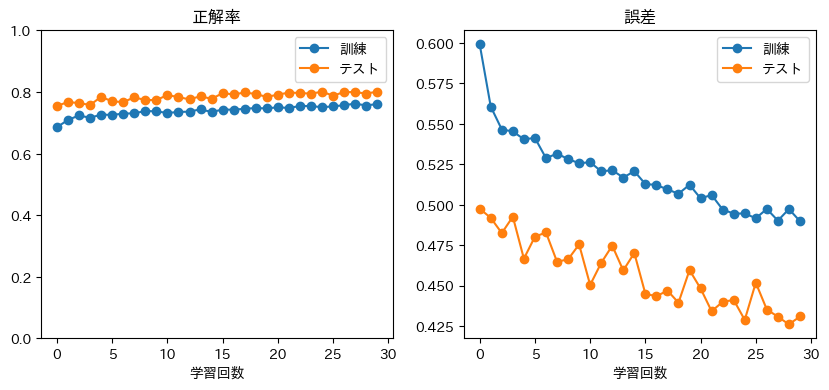

In [ ]:
# 学習結果の確認（2回目）
param = [["正解率", "accuracy", "val_accuracy"],
         ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練", "テスト"], loc = "best")
    if i == 0:
        plt.ylim([0,1])
plt.show()

63/63 [==============================] - 1s 13ms/step


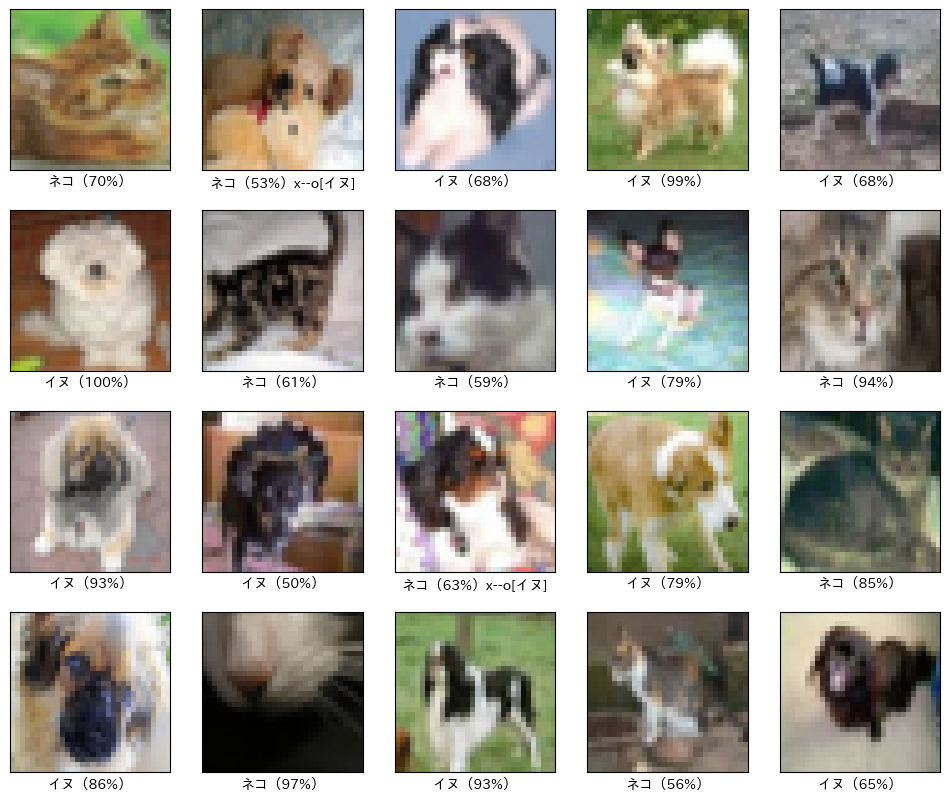

In [ ]:
# 識別用画像を渡して識別結果を確認
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o[" + class_names[y_test[i]] + "]"
    lbl = f"{class_names[index]}（{pct:.0%}）{ans}"
    plt.xlabel(lbl)
plt.show()